## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [8]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-1
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.99, 0.95, 0.8,0.5,0.3]

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for MOM in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (MOM))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-MOMENTUM-%s" % str(MOM)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.990000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 363us/step - loss: 2.0482 - acc: 0.2443 - val_loss: 1.9137 - val_acc: 0.3063
Epoch 2/50
50000/50000 [==============================] - 18s 357us/step - loss: 1.8216 - acc: 0.3381 - val_loss: 1.8243 - val_acc: 0.3506
Epoch 3/50
50000/50000 [==============================] - 18s 355us/step - loss: 1.7518 - acc: 0.3643 - val_loss: 1.7041 - val_acc: 0.3852
Epoch 4/50
50000/50000 [==============================] - 18s 356us/step - loss: 1.7118 - acc: 0.3855 - val_loss: 1.6784 - val_acc: 0.3961
Epoch 5/50
50000/50000 [==============================] - 18s 359us/step - loss: 1.6762 - acc: 0.3970 - val_loss: 1.6882 - val_acc: 0.3832
Epoch 6/50
50000/50000 [==============================] - 18s 356us/step - loss: 1.6473 - acc: 0.4102 - val_loss: 1.6627 - val_acc: 0.4040
Epoch 7/50
50000/50000 [==============================] - 18s 357us/step - loss: 1.6452 - acc: 0.4106 - val_loss: 1.

50000/50000 [==============================] - 18s 363us/step - loss: 2.0601 - acc: 0.2443 - val_loss: 1.9323 - val_acc: 0.2928
Epoch 2/50
50000/50000 [==============================] - 18s 357us/step - loss: 1.8388 - acc: 0.3360 - val_loss: 1.7468 - val_acc: 0.3713
Epoch 3/50
50000/50000 [==============================] - 18s 358us/step - loss: 1.7078 - acc: 0.3860 - val_loss: 1.9975 - val_acc: 0.3387
Epoch 4/50
50000/50000 [==============================] - 18s 356us/step - loss: 1.6690 - acc: 0.4016 - val_loss: 1.6746 - val_acc: 0.4016
Epoch 5/50
50000/50000 [==============================] - 18s 359us/step - loss: 1.5879 - acc: 0.4327 - val_loss: 1.6332 - val_acc: 0.4166
Epoch 6/50
50000/50000 [==============================] - 18s 357us/step - loss: 1.5619 - acc: 0.4425 - val_loss: 1.7159 - val_acc: 0.3870
Epoch 7/50
50000/50000 [==============================] - 18s 358us/step - loss: 1.5387 - acc: 0.4478 - val_loss: 1.5365 - val_acc: 0.4489
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 19s 370us/step - loss: 2.0721 - acc: 0.2447 - val_loss: 2.2792 - val_acc: 0.2384
Epoch 2/50
50000/50000 [==============================] - 18s 357us/step - loss: 1.8601 - acc: 0.3320 - val_loss: 1.8405 - val_acc: 0.3437
Epoch 3/50
50000/50000 [==============================] - 18s 356us/step - loss: 1.7568 - acc: 0.3723 - val_loss: 2.1883 - val_acc: 0.2920
Epoch 4/50
50000/50000 [==============================] - 18s 359us/step - loss: 1.6999 - acc: 0.3948 - val_loss: 1.6849 - val_acc: 0.3855
Epoch 5/50
50000/50000 [==============================] - 18s 358us/step - loss: 1.6284 - acc: 0.4184 - val_loss: 1.7207 - val_acc: 0.3870
Epoch 6/50
50000/50000 [==============================] - 18s 358us/step - loss: 1.5780 - acc: 0.4369 - val_loss: 1.7551 - val_acc: 0.3830
Epoch 7/50
50000/50000 [==============================] - 18s 359us/step - loss: 1.5417 - acc: 0.4506 - val_loss: 1.5932 - val_acc: 0.4379
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 19s 376us/step - loss: 2.0721 - acc: 0.2427 - val_loss: 1.8944 - val_acc: 0.3236
Epoch 2/50
50000/50000 [==============================] - 18s 360us/step - loss: 1.8379 - acc: 0.3402 - val_loss: 1.7755 - val_acc: 0.3560
Epoch 3/50
50000/50000 [==============================] - 18s 364us/step - loss: 1.7479 - acc: 0.3746 - val_loss: 1.9393 - val_acc: 0.3261
Epoch 4/50
50000/50000 [==============================] - 18s 362us/step - loss: 1.6709 - acc: 0.4021 - val_loss: 1.8636 - val_acc: 0.3507
Epoch 5/50
50000/50000 [==============================] - 18s 362us/step - loss: 1.6271 - acc: 0.4202 - val_loss: 1.8162 - val_acc: 0.3579
Epoch 6/50
50000/50000 [==============================] - 18s 362us/step - loss: 1.5801 - acc: 0.4366 - val_loss: 1.6881 - val_acc: 0.3780
Epoch 7/50
50000/50000 [==============================] - 18s 364us/step - loss: 1.5562 - acc: 0.4449 - val_loss: 1.7791 - val_acc: 0.3752
Epoch 8/50
50000/50000 [==============

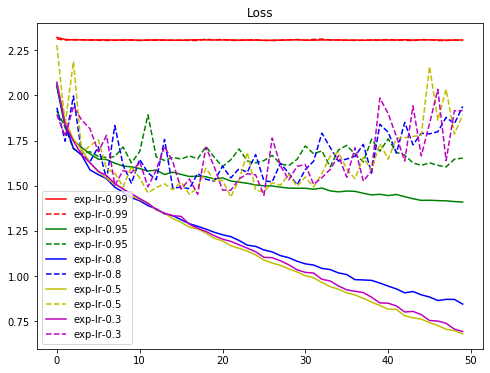

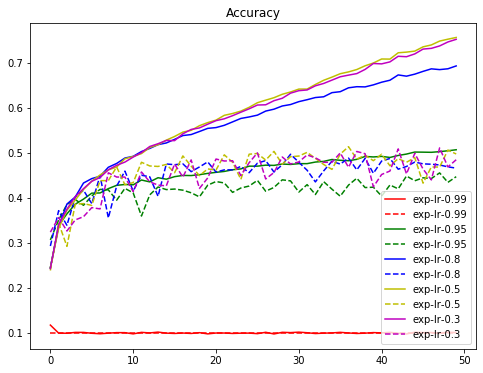

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()